In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing loan csv as a dataframe
df = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
# Analysing the head of the dataframe to get a high level understanding of the data
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Displaying the info of the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
# List of columns having NULL values

column_df = pd.DataFrame({
    'columns': df.columns,
    'missing_perc': (df.isnull().sum() * 100 / len(df)).round(1)
})

column_df = column_df.reset_index(drop=True)

# null columns: column_df[column_df.missing_perc == 100.0]

print("Count of NULL columns", (column_df[column_df.missing_perc == 100.0]).count().columns)
print("NULL columns are listed below:")
column_df[column_df.missing_perc == 100.0]['columns']

Count of NULL columns 54
NULL columns are listed below:


50        mths_since_last_major_derog
53                   annual_inc_joint
54                          dti_joint
55          verification_status_joint
57                       tot_coll_amt
58                        tot_cur_bal
59                        open_acc_6m
60                         open_il_6m
61                        open_il_12m
62                        open_il_24m
63                 mths_since_rcnt_il
64                       total_bal_il
65                            il_util
66                        open_rv_12m
67                        open_rv_24m
68                         max_bal_bc
69                           all_util
70                   total_rev_hi_lim
71                             inq_fi
72                        total_cu_tl
73                       inq_last_12m
74               acc_open_past_24mths
75                        avg_cur_bal
76                     bc_open_to_buy
77                            bc_util
80                 mo_sin_old_il_acct
81          

In [6]:
# removing empty columns from df
null_columns = (column_df[column_df.missing_perc == 100.0])['columns']
df = df.drop(null_columns, axis=1)
df.shape

(39717, 57)

In [7]:
# remove columns that have all values same as it does not influence results
cl_unique=df.nunique()
print('cl_unique', cl_unique)
cl=cl_unique[cl_unique.values == 1]
print('Columns with only single value which does not impact the analysis', cl)
df.drop(columns = list(cl.index), inplace=True)
df.shape

cl_unique id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths    

(39717, 48)

The company wants to identify the risk of the applicants,
- The data collected after the approval of loan is not useful for the analysis.
- The fields which are unique for each applicant like id, member_id, url are also not useful for the analysis.
- Zipcode values are not fully available and hence this is also not much useful here.
- Dropping these values help us to focus on the significant values.

In [8]:
# Dropping insignificant columns

del_cols = ["id","member_id","url","zip_code","out_prncp_inv","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","emp_title"]
df.drop(columns= del_cols, inplace=True)
df.shape

(39717, 33)

<AxesSubplot:ylabel='Count'>

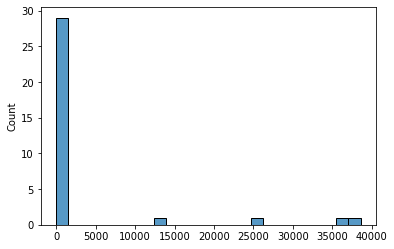

In [9]:
# Identifying columns with null values
null_val=df.isnull().sum()
sns.histplot(data=null_val, bins=25)


#### Insights:
From the above graph we can see that there are some columns that have more than 10,000 null values i.e, more than 25% are null

In [10]:
# dropping the columns having null values more than 25%

df.drop(columns=list(null_val[null_val.values >10000].index), inplace=True)

In [11]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,12231.890000,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,3513.330000,0.0


In [12]:
#Int_rate and revol_util has percentage in the values, lets remove percentage
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [13]:
# Evaluating "emp_length"
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [14]:
#formatting emp_length column to convert '10+yrs to 10', '< 1 years to 1' and convert values to numeric to use it for analysis
df['emp_length'] = df['emp_length'].replace('10+ years', '10 years' )
df['emp_length'] = df['emp_length'].replace('< 1 year', '0 years' )
df['emp_length']= df.emp_length.str.extract('(\d+)')

In [15]:
df['emp_length'].value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [16]:
# Checking the number of NULL values
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
total_pymnt                0
pub_rec_bankruptcies     697
dtype: int64

In [17]:
#dropping off the null values for emp_length, revol_util, title and pub_rec_bankruptcies as the count is very less comapred to the total data frame
df=df[~(df['emp_length'].isnull())]
df=df[~(df['revol_util'].isnull())]
df=df[~(df['pub_rec_bankruptcies'].isnull())]
df=df[~(df['title'].isnull())]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37888 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37888 non-null  int64  
 1   funded_amnt           37888 non-null  int64  
 2   funded_amnt_inv       37888 non-null  float64
 3   term                  37888 non-null  object 
 4   int_rate              37888 non-null  object 
 5   installment           37888 non-null  float64
 6   grade                 37888 non-null  object 
 7   sub_grade             37888 non-null  object 
 8   emp_length            37888 non-null  object 
 9   home_ownership        37888 non-null  object 
 10  annual_inc            37888 non-null  float64
 11  verification_status   37888 non-null  object 
 12  issue_d               37888 non-null  object 
 13  loan_status           37888 non-null  object 
 14  purpose               37888 non-null  object 
 15  title              

In [19]:
#convert amount columns to numeric data to find correlation
cols=['loan_amnt', 'funded_amnt', 'int_rate', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'emp_length', ]
df[cols] = df[cols].apply(pd.to_numeric)

In [20]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,12231.890000,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,3513.330000,0.0


In [21]:
#dropping account status with current as the ongoing loan application will not be of much use to our analysis.
df = df[~(df['loan_status']== 'Current')]
df['loan_status'].value_counts()
df.shape

(36790, 29)

In [22]:
# Evaluating title
df.title.value_counts().count()

18402

In [23]:
# Since title has a lot of unique values, we can drop this column as this is not significant
df.drop(columns=['title'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36790 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36790 non-null  int64  
 1   funded_amnt           36790 non-null  int64  
 2   funded_amnt_inv       36790 non-null  float64
 3   term                  36790 non-null  object 
 4   int_rate              36790 non-null  float64
 5   installment           36790 non-null  float64
 6   grade                 36790 non-null  object 
 7   sub_grade             36790 non-null  object 
 8   emp_length            36790 non-null  int64  
 9   home_ownership        36790 non-null  object 
 10  annual_inc            36790 non-null  float64
 11  verification_status   36790 non-null  object 
 12  issue_d               36790 non-null  object 
 13  loan_status           36790 non-null  object 
 14  purpose               36790 non-null  object 
 15  addr_state         

#### From the above information, we can see that there are no more null values in the dataframe

In [25]:
# Evaluating "pub_rec_bankruptcies"
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    35256
1.0     1529
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
#Correlation Matrix
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981592,0.952019,0.299827,0.931186,0.148642,0.270201,0.060013,-0.034844,0.011159,0.174512,-0.047179,0.315989,0.255633,NaN,0.881914,-0.031921
funded_amnt,0.981592,1.000000,0.971413,0.303944,0.957283,0.148473,0.266190,0.060115,-0.034854,0.011285,0.173153,-0.047621,0.308888,0.250063,NaN,0.898989,-0.032876
funded_amnt_inv,0.952019,0.971413,1.000000,0.294375,0.923657,0.155882,0.257212,0.063192,-0.038680,0.000153,0.163078,-0.051535,0.292549,0.241128,NaN,0.885341,-0.037813
int_rate,0.299827,0.303944,0.294375,1.000000,0.275887,-0.001651,0.047735,0.107768,0.158832,0.135562,0.008824,0.098977,0.096570,-0.045925,NaN,0.289777,0.083175
installment,0.931186,0.957283,0.923657,0.275887,1.000000,0.122151,0.269172,0.049992,-0.023102,0.008948,0.170347,-0.042633,0.312098,0.229975,NaN,0.858449,-0.029516
emp_length,0.148642,0.148473,0.155882,-0.001651,0.122151,1.000000,0.111911,0.048485,0.014782,0.009626,0.096744,0.064547,0.150989,0.206974,NaN,0.131320,0.062585
annual_inc,0.270201,0.266190,0.257212,0.047735,0.269172,0.111911,1.000000,-0.123599,0.021205,0.034595,0.156304,-0.014429,0.276145,0.236339,NaN,0.257474,-0.012434
dti,0.060013,0.060115,0.063192,0.107768,0.049992,0.048485,-0.123599,1.000000,-0.034933,0.000776,0.290004,-0.005460,0.227943,0.228126,NaN,0.057470,0.006418
delinq_2yrs,-0.034844,-0.034854,-0.038680,0.158832,-0.023102,0.014782,0.021205,-0.034933,1.000000,0.008313,0.011066,0.010937,-0.056323,0.066945,NaN,-0.025396,0.005808
inq_last_6mths,0.011159,0.011285,0.000153,0.135562,0.008948,0.009626,0.034595,0.000776,0.008313,1.000000,0.094342,0.023212,-0.024585,0.115264,NaN,-0.008842,0.014262


In [27]:
# evaluating "out_prncp"
df.out_prncp.value_counts()

0.0    36790
Name: out_prncp, dtype: int64

In [28]:
# Remove column out_prncp as this has only one value
df.drop(columns=['out_prncp'], inplace=True)

In [29]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981592,0.952019,0.299827,0.931186,0.148642,0.270201,0.060013,-0.034844,0.011159,0.174512,-0.047179,0.315989,0.255633,0.881914,-0.031921
funded_amnt,0.981592,1.000000,0.971413,0.303944,0.957283,0.148473,0.266190,0.060115,-0.034854,0.011285,0.173153,-0.047621,0.308888,0.250063,0.898989,-0.032876
funded_amnt_inv,0.952019,0.971413,1.000000,0.294375,0.923657,0.155882,0.257212,0.063192,-0.038680,0.000153,0.163078,-0.051535,0.292549,0.241128,0.885341,-0.037813
int_rate,0.299827,0.303944,0.294375,1.000000,0.275887,-0.001651,0.047735,0.107768,0.158832,0.135562,0.008824,0.098977,0.096570,-0.045925,0.289777,0.083175
installment,0.931186,0.957283,0.923657,0.275887,1.000000,0.122151,0.269172,0.049992,-0.023102,0.008948,0.170347,-0.042633,0.312098,0.229975,0.858449,-0.029516
emp_length,0.148642,0.148473,0.155882,-0.001651,0.122151,1.000000,0.111911,0.048485,0.014782,0.009626,0.096744,0.064547,0.150989,0.206974,0.131320,0.062585
annual_inc,0.270201,0.266190,0.257212,0.047735,0.269172,0.111911,1.000000,-0.123599,0.021205,0.034595,0.156304,-0.014429,0.276145,0.236339,0.257474,-0.012434
dti,0.060013,0.060115,0.063192,0.107768,0.049992,0.048485,-0.123599,1.000000,-0.034933,0.000776,0.290004,-0.005460,0.227943,0.228126,0.057470,0.006418
delinq_2yrs,-0.034844,-0.034854,-0.038680,0.158832,-0.023102,0.014782,0.021205,-0.034933,1.000000,0.008313,0.011066,0.010937,-0.056323,0.066945,-0.025396,0.005808
inq_last_6mths,0.011159,0.011285,0.000153,0.135562,0.008948,0.009626,0.034595,0.000776,0.008313,1.000000,0.094342,0.023212,-0.024585,0.115264,-0.008842,0.014262


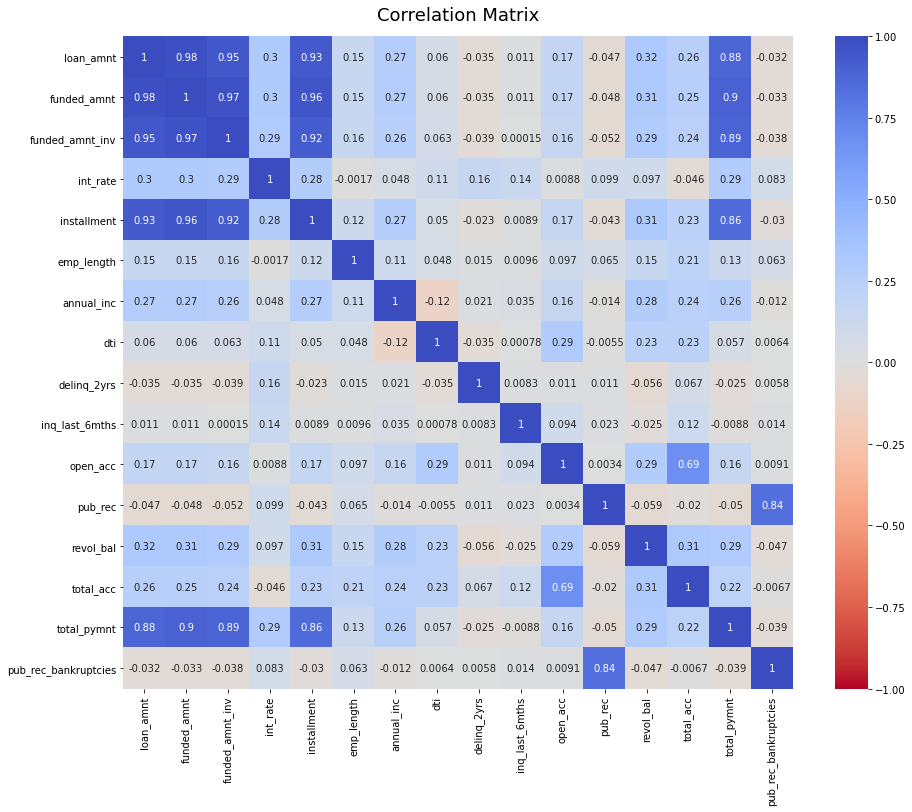

In [30]:
#Correlation Matrix
plt.figure(figsize=(15,12))
corr_plot = sns.heatmap(df.corr(), cmap='coolwarm_r', vmin=-1, vmax=1, annot=True)
corr_plot.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=16);
plt.show(corr_plot)

#### Creating Derived Columns from 'issue_d'

In [31]:
#extracting month and year from issue_d
df.issue_d= pd.to_datetime(df.issue_d, format= '%b-%y')
df['issue_year']= df['issue_d'].dt.year
df['issue_month']= df['issue_d'].dt.month

In [32]:
# Analysing the head of the dataframe to get a high level understanding of the data
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,5863.155187,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,1008.710000,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,3005.666844,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,12231.890000,0.0,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,5632.210000,0.0,2011,12


In [33]:
# Evaluating 'earliest_cr_line'
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [34]:
# Converting 'earliest_cr_line' to date format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')

#### Creating derived columns from 'earliest_cr_line'

In [35]:
# Splitting the earliest_cr_line to Month and Year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [36]:
# Evaluating earliest_cr_line_month
df['earliest_cr_line_month'].value_counts().sort_index()

1     3202
2     2640
3     2564
4     2531
5     2687
6     2731
7     2827
8     3080
9     3332
10    3796
11    3647
12    3753
Name: earliest_cr_line_month, dtype: int64

In [37]:
# Evaluating earliest_cr_line_year
df['earliest_cr_line_year'].value_counts().sort_index()

1969      26
1970      37
1971      38
1972      34
1973      45
1974      53
1975      66
1976      74
1977      98
1978     136
1979     137
1980     157
1981     160
1982     194
1983     303
1984     364
1985     407
1986     448
1987     565
1988     670
1989     787
1990     947
1991     894
1992     976
1993    1387
1994    1861
1995    1984
1996    2113
1997    2292
1998    2666
1999    2805
2000    3035
2001    2385
2002    1813
2003    1749
2004    1668
2005    1425
2006    1114
2007     676
2008     144
2046       1
2050       1
2054       1
2056       1
2062       3
2063       4
2064       3
2065       6
2066       8
2067      15
2068      14
Name: earliest_cr_line_year, dtype: int64

In [38]:
# Some values of the years are in future which seem like flawed data, hence need to be imputed with reasonable values
print('No of rows with year more than 2021:',len(df[df['earliest_cr_line_year'] > 2021 ]))


No of rows with year more than 2021: 57


In [39]:
# Our assumption is that there is a chance that while conversion, some 1900s got converted to 2000s
# hence reducing 100 yrs from the data which has year beyond 2021
df.loc[df['earliest_cr_line_year'] > 2021 , 'earliest_cr_line_year'] = df['earliest_cr_line_year'] - 100
print('No of rows with year more than 2021:',len(df[df['earliest_cr_line_year'] > 2021 ]))

No of rows with year more than 2021: 0


In [40]:
#exporting the cleaned data to the master file
df.to_csv('clean_data.csv', encoding='utf-8', index=False)

## Checking for outliers and Univariate Analysis

In [41]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year
count,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,3.679000e+04,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000,36790.000000
mean,11149.963305,10881.383528,10439.862462,11.983224,324.927339,4.964257,6.943917e+04,13.335175,0.146127,0.869666,9.302609,0.054200,13376.127806,22.153194,12001.292237,0.041832,2010.349742,7.157896,6.894509,1996.761946
std,7369.888921,7109.427800,7008.723784,3.701092,208.905592,3.552222,6.402864e+04,6.649967,0.491865,1.068123,4.375558,0.235592,15849.930145,11.407992,8854.630629,0.200886,0.815578,3.380456,3.539495,6.625835
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2007.000000,1.000000,1.000000,1946.000000
25%,5500.000000,5400.000000,5000.000000,8.940000,167.730000,2.000000,4.116900e+04,8.220000,0.000000,0.000000,6.000000,0.000000,3729.250000,14.000000,5572.593071,0.000000,2010.000000,4.000000,4.000000,1994.000000
50%,10000.000000,9600.000000,9000.000000,11.830000,280.175000,4.000000,6.000000e+04,13.430000,0.000000,1.000000,9.000000,0.000000,8869.000000,20.000000,9817.849268,0.000000,2011.000000,7.000000,7.000000,1998.000000
75%,15000.000000,15000.000000,14350.000000,14.460000,429.440000,9.000000,8.300000e+04,18.590000,0.000000,1.000000,12.000000,0.000000,17031.000000,29.000000,16305.565000,0.000000,2011.000000,10.000000,10.000000,2001.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,2.000000,2011.000000,12.000000,12.000000,2008.000000


In [42]:
# Function to draw a boxplot 
def drawBoxPlot(col_name,x_label):
    # @Params
    # col_name : column to be ploted
    # x_label: Label on the x_axis
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col_name], palette='flare')
    plt.xlabel(x_label)
    plt.show()
    
# Function to create range for quantitative variables: low, medium, high, very high
def convertToRange(val,col,data=df):
    # @Params
    # val : value to be evaluated
    # col : name of the column val belongs to
    # data: overall dataframe/dataset
    
    iqr = (data[col].quantile(0.75) - data[col].quantile(0.25)).round(2)
    quant_25 = data[col].quantile(0.25).round(2)
    quant_75 = data[col].quantile(0.75).round(2)
    iqr_max = (quant_75 + 1.5*iqr).round(2)
    
    if val <= quant_25: #25%ile range
        return 'low 0-'+ str(quant_25)
    if val > quant_25 and val <= quant_75: #25%ile to 75%ile
        return 'medium ' + str(quant_25)+ '-' + str(quant_75)
    if val > quant_75 and val <= (iqr_max) : #75%ile to "q3 + 1.5*iqr"
        return 'high ' + str(quant_75)+ '-' + str(iqr_max)
    return 'very high ' + str(iqr_max) + '+'

# Function to draw a count plot wrt to loan status => 0: defaulted, 1: Fully paid
def drawBarWithLoanStatus(col, figsize=(10,5),data=df):
#     ncount = len(df)
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.countplot(data=data, y=col, hue='loan_status', ax=ax, order=data[col].value_counts().sort_index().index)
    plt.show(g)

### 1. loan_status

In [43]:
df.loan_status.value_counts(dropna=False)

Fully Paid     31525
Charged Off     5265
Name: loan_status, dtype: int64

In [44]:
# Converting "loan_status" from variables to continuous variable

# Change Fully Paid to 1 and Charged Off to 0
df["loan_status_code"] = df["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)

In [45]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year,loan_status_code
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.155187,0.0,2011,12,1,1985,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.710000,0.0,2011,12,4,1999,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.666844,0.0,2011,12,11,2001,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21,37,12231.890000,0.0,2011,12,2,1996,1
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.210000,0.0,2011,12,11,2004,1


#### Insights
- Majority of the loans are fully paid off
- 14.31% loans have been defaulted on

### 2. loan_amnt

In [46]:
df['loan_amnt'].describe()

count    36790.000000
mean     11149.963305
std       7369.888921
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

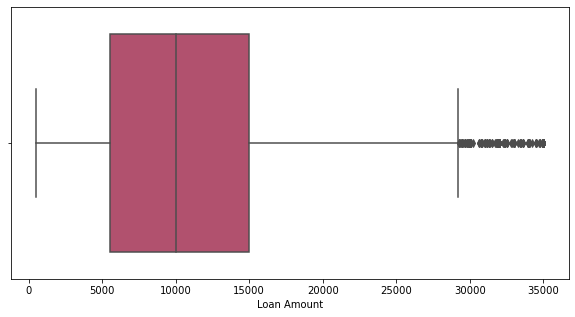

In [47]:
drawBoxPlot('loan_amnt', 'Loan Amount')

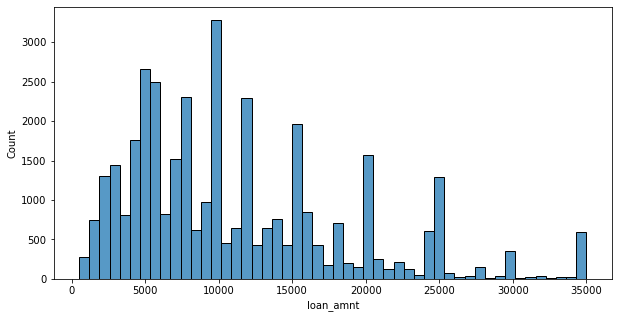

In [48]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['loan_amnt'], bins=50)
plt.show()

#### Insights
- Mean and Median values are fairly alike (~10000)
- Loan amount varies from 500 to 35000 USD

### 2. funded_amnt

In [49]:
df['funded_amnt'].describe()

count    36790.000000
mean     10881.383528
std       7109.427800
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

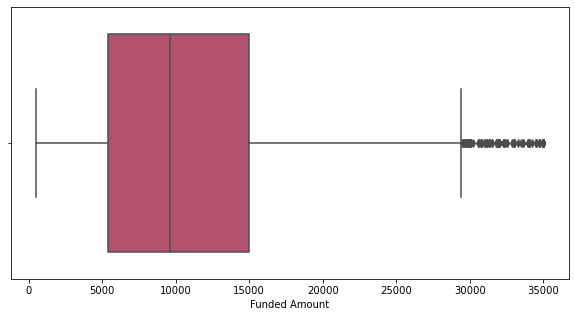

In [50]:
drawBoxPlot("funded_amnt", 'Funded Amount')

#### Insights
- Mean and Median values are fairly alike (~10000)

### 3. funded_amnt_inv

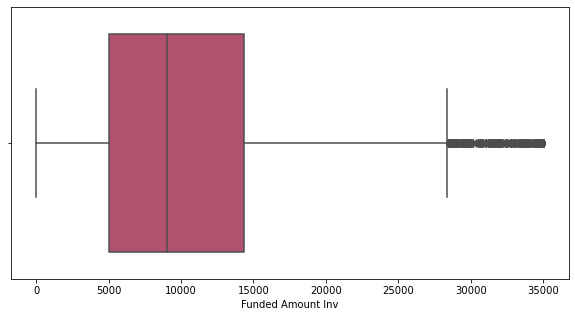

In [51]:

drawBoxPlot("funded_amnt_inv", 'Funded Amount Inv')

In [52]:
df["funded_amnt_inv"].describe()

count    36790.000000
mean     10439.862462
std       7008.723784
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [53]:
df["funded_amnt_inv"].value_counts()

5000.000000     1237
10000.000000    1224
6000.000000     1143
12000.000000    1001
8000.000000      855
                ... 
7363.934748        1
13789.311550       1
15989.352050       1
9928.987017        1
34972.352450       1
Name: funded_amnt_inv, Length: 7593, dtype: int64

#### Insights
- Mean and Median values are fairly alike (~10000)

### 4. term

In [54]:
df.term.value_counts()

 36 months    27539
 60 months     9251
Name: term, dtype: int64

In [55]:
# removing months text from the values
df['term'] = df.term.apply(lambda x: x.replace(' months',''))

In [56]:
df.term.value_counts()

 36    27539
 60     9251
Name: term, dtype: int64

#### Insights
- Majority of the loans are taken for a period of 36 months (74.85%)

### 5. int_rate

In [57]:
df['int_rate'].value_counts()

10.99    891
11.49    765
7.51     756
13.49    736
7.88     701
        ... 
9.01       1
17.54      1
16.96      1
10.46      1
12.36      1
Name: int_rate, Length: 336, dtype: int64

In [58]:
df['int_rate'].describe()

count    36790.000000
mean        11.983224
std          3.701092
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

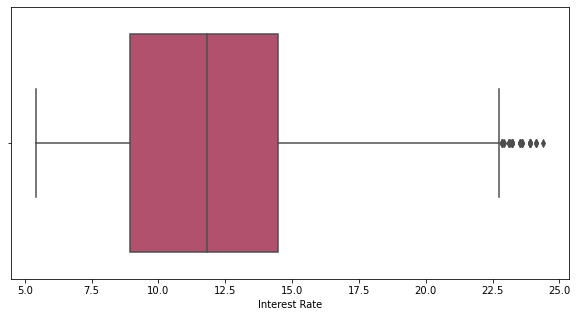

In [59]:
drawBoxPlot("int_rate", 'Interest Rate')

### 6. installment

In [60]:
df['installment'].describe()

count    36790.000000
mean       324.927339
std        208.905592
min         16.080000
25%        167.730000
50%        280.175000
75%        429.440000
max       1305.190000
Name: installment, dtype: float64

In [61]:
#df['installment'].quantile(0.97)

In [62]:
df['installment'].value_counts()

311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
378.24     1
720.65     1
480.71     1
316.16     1
339.26     1
Name: installment, Length: 14382, dtype: int64

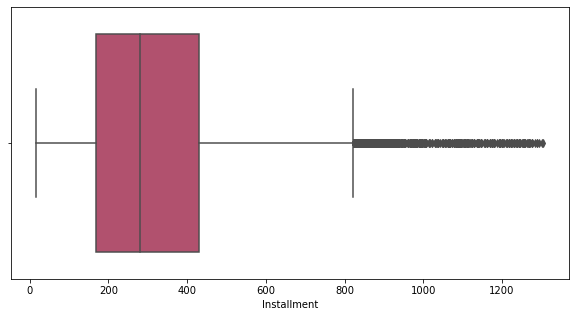

In [63]:
drawBoxPlot("installment", 'Installment')

In [64]:
# Since there is a significant diff between the 75 %ile and the max value, we should study for outliers

installment_q3 = df.installment.quantile(0.75)
installment_q1 = df.installment.quantile(0.25)
iqr = installment_q3 - installment_q1

perc_check = df[df['installment'] > (installment_q3 + 1.5*iqr)].installment.count()/df.installment.count() *100
# installment_q3 + 1.5*iqr => 821.8175
print("Percentage of values beyond 'Q3 + 1.5 IQR'is:",perc_check.round(2),"%")
# if perc_check is more than 1% then remove the outliers
# OR
# We can convert installment from a continuous variable to a categorical variable to derive better insights

Percentage of values beyond 'Q3 + 1.5 IQR'is: 3.33 %


In [65]:
# Function to create range of installments: low, medium, high, very high
df['installment_range'] = df['installment'].apply(lambda x: convertToRange(x,'installment'))

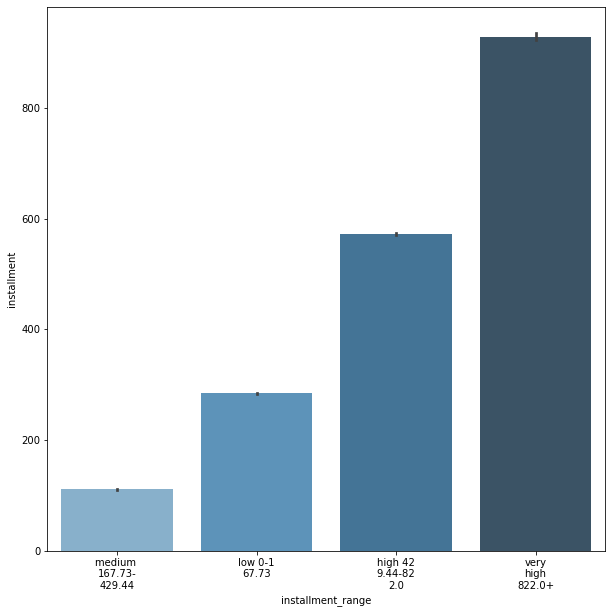

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x="installment_range", y="installment", data=df, palette="Blues_d")
ax.set_xticklabels([textwrap.fill(e, 7) for e in df['installment_range'].value_counts().index])
plt.show(g)

### 7. emp_length

In [67]:
df['emp_length'].value_counts()

10    8367
0     4328
2     4202
3     3947
4     3288
5     3155
1     3070
6     2132
7     1685
8     1408
9     1208
Name: emp_length, dtype: int64

In [68]:
df['emp_length'].describe()

count    36790.000000
mean         4.964257
std          3.552222
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

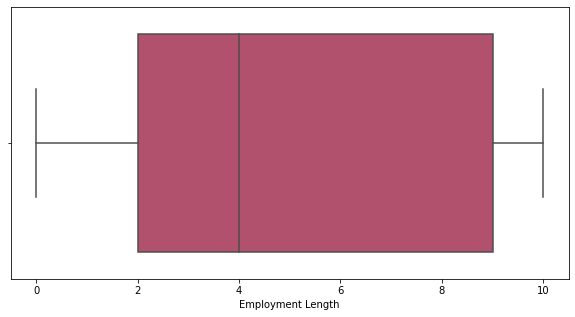

In [69]:
drawBoxPlot('emp_length','Employment Length')

### 8. annual_inc

In [70]:
df['annual_inc'].describe()

count    3.679000e+04
mean     6.943917e+04
std      6.402864e+04
min      4.000000e+03
25%      4.116900e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

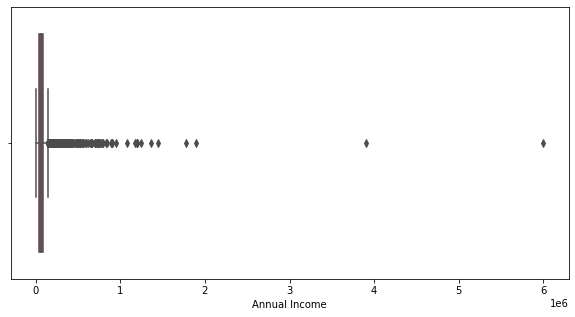

In [71]:
drawBoxPlot('annual_inc', "Annual Income")

In [72]:
# Since max value is 100 times the mean and median, we should study for outliers

annual_inc_q3 = df.annual_inc.quantile(0.75)
annual_inc_q1 = df.annual_inc.quantile(0.25)
iqr = annual_inc_q3 - annual_inc_q1

perc_check = df[df['annual_inc'] > (annual_inc_q3 + 1.5*iqr)].annual_inc.count()/df.annual_inc.count() *100
# annual_inc_q3 + 1.5*iqr => 821.8175
print("Percentage of values beyond 'Q3 + 1.5 IQR'is:",perc_check.round(2),"%", annual_inc_q3 + 1.5*iqr)

Percentage of values beyond 'Q3 + 1.5 IQR'is: 4.63 % 145746.5


In [73]:
#Removing values above 95%ile or more than Q3 + 1.5 IQR
df = df[df['annual_inc']<df['annual_inc'].quantile(0.95)]
df['annual_inc'].describe()

count     34949.000000
mean      61541.258486
std       27713.238391
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

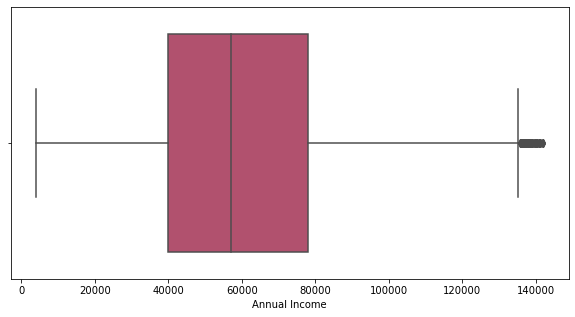

In [74]:
drawBoxPlot('annual_inc', "Annual Income")

### 9. dti

In [75]:
df['dti'].describe()

count    34949.000000
mean        13.507147
std          6.640857
min          0.000000
25%          8.430000
50%         13.650000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

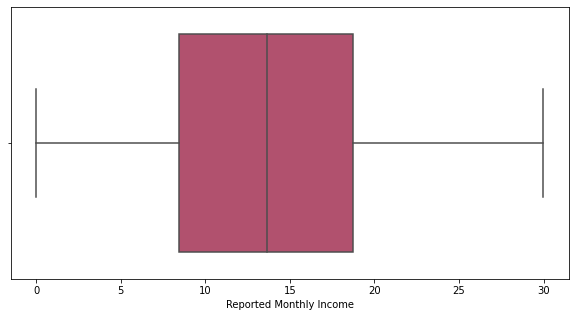

In [76]:
drawBoxPlot('dti', 'Reported Monthly Income')

### 10. revol_bal

In [77]:
df['revol_bal'].describe()

count     34949.000000
mean      12402.050388
std       13777.230508
min           0.000000
25%        3629.000000
50%        8618.000000
75%       16243.000000
max      149000.000000
Name: revol_bal, dtype: float64

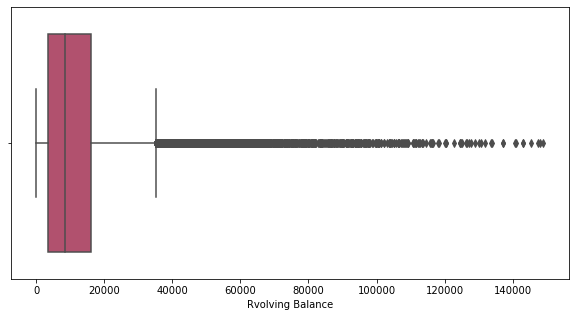

In [78]:
drawBoxPlot('revol_bal', 'Rvolving Balance')

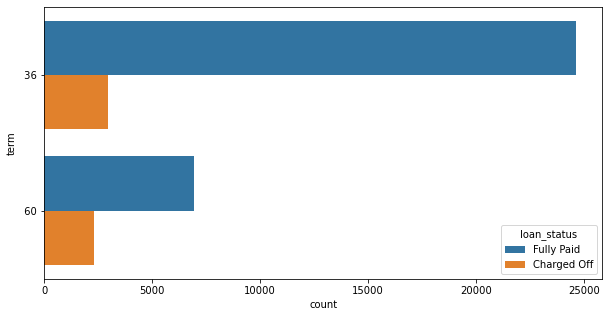

In [79]:
drawBarWithLoanStatus("term")

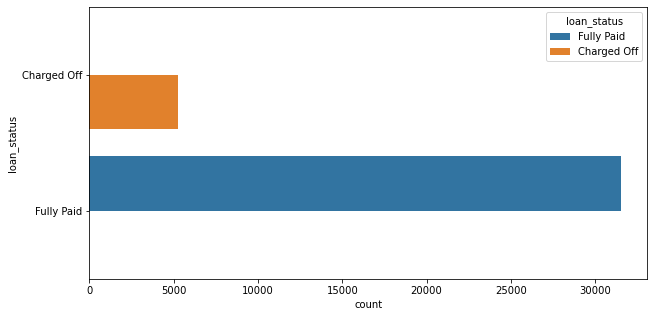

In [80]:
drawBarWithLoanStatus("loan_status")

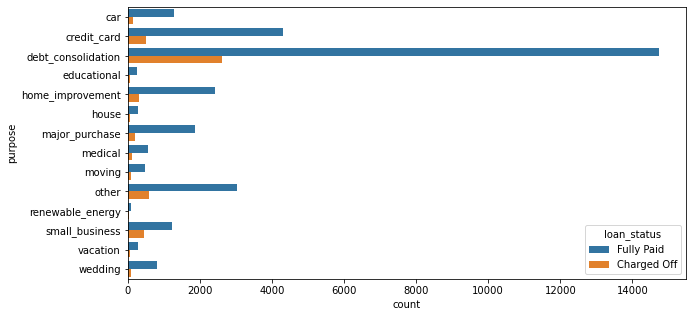

In [81]:
drawBarWithLoanStatus("purpose")

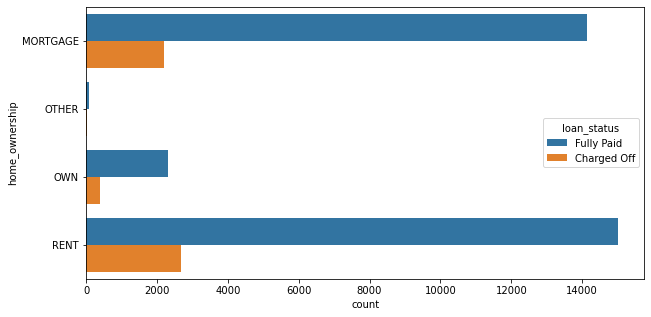

In [82]:
drawBarWithLoanStatus("home_ownership")

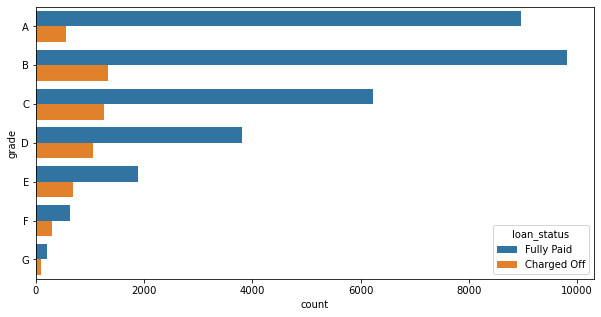

In [83]:
drawBarWithLoanStatus("grade")

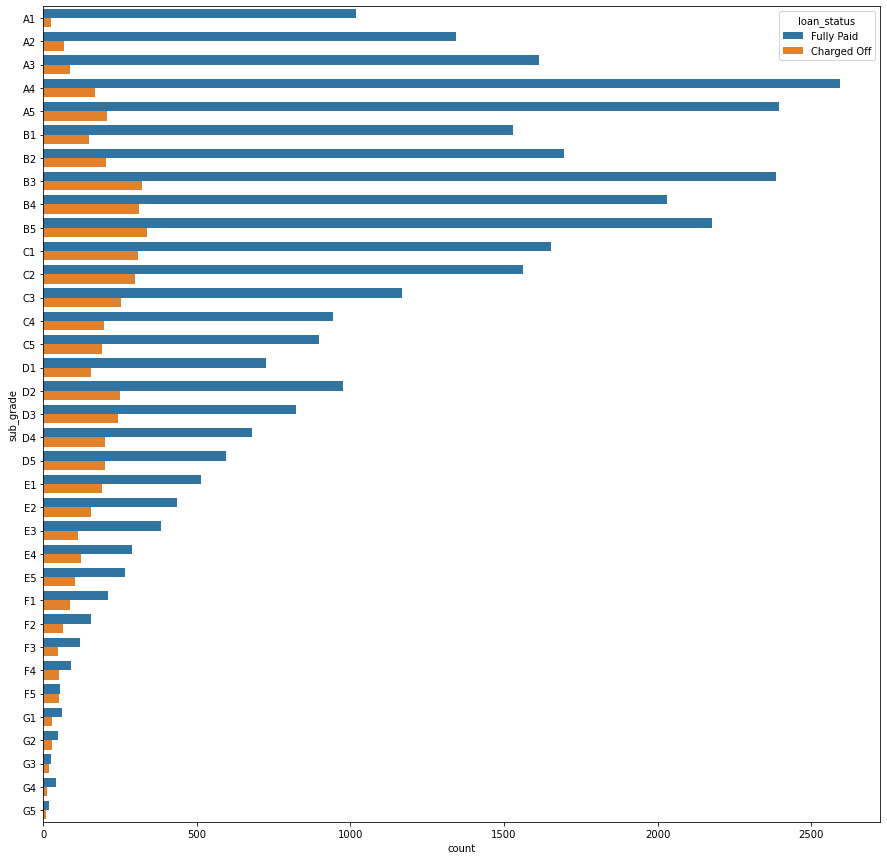

In [84]:
drawBarWithLoanStatus("sub_grade", figsize=(15,15))

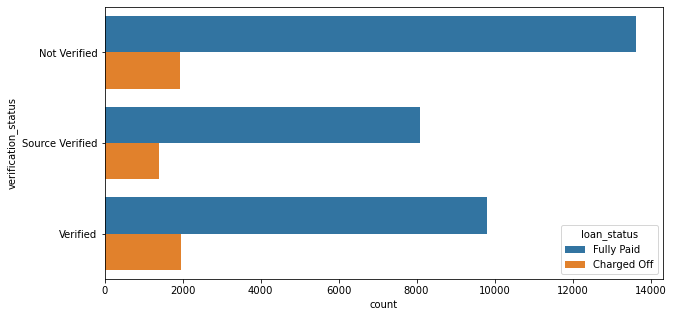

In [85]:
drawBarWithLoanStatus("verification_status")

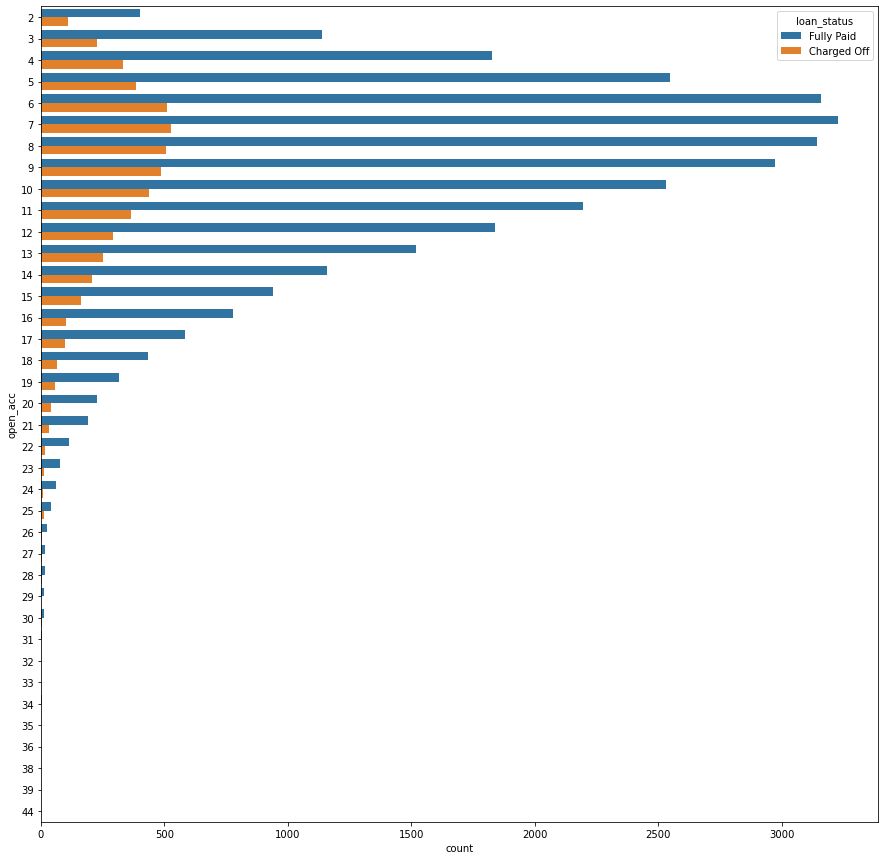

In [86]:
drawBarWithLoanStatus("open_acc", figsize=(15,15))

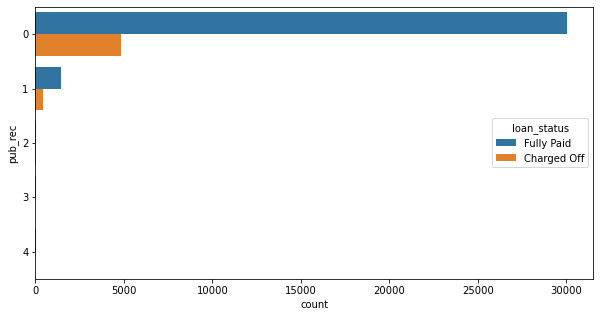

In [87]:
drawBarWithLoanStatus("pub_rec")

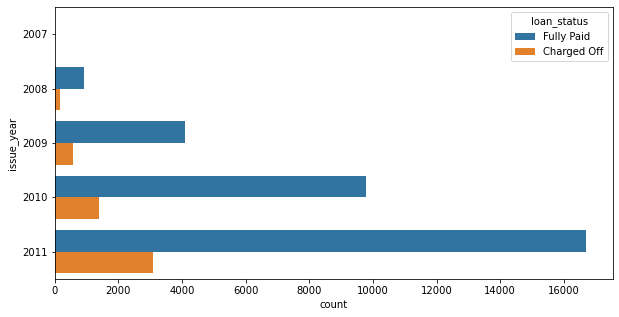

In [88]:
drawBarWithLoanStatus("issue_year")

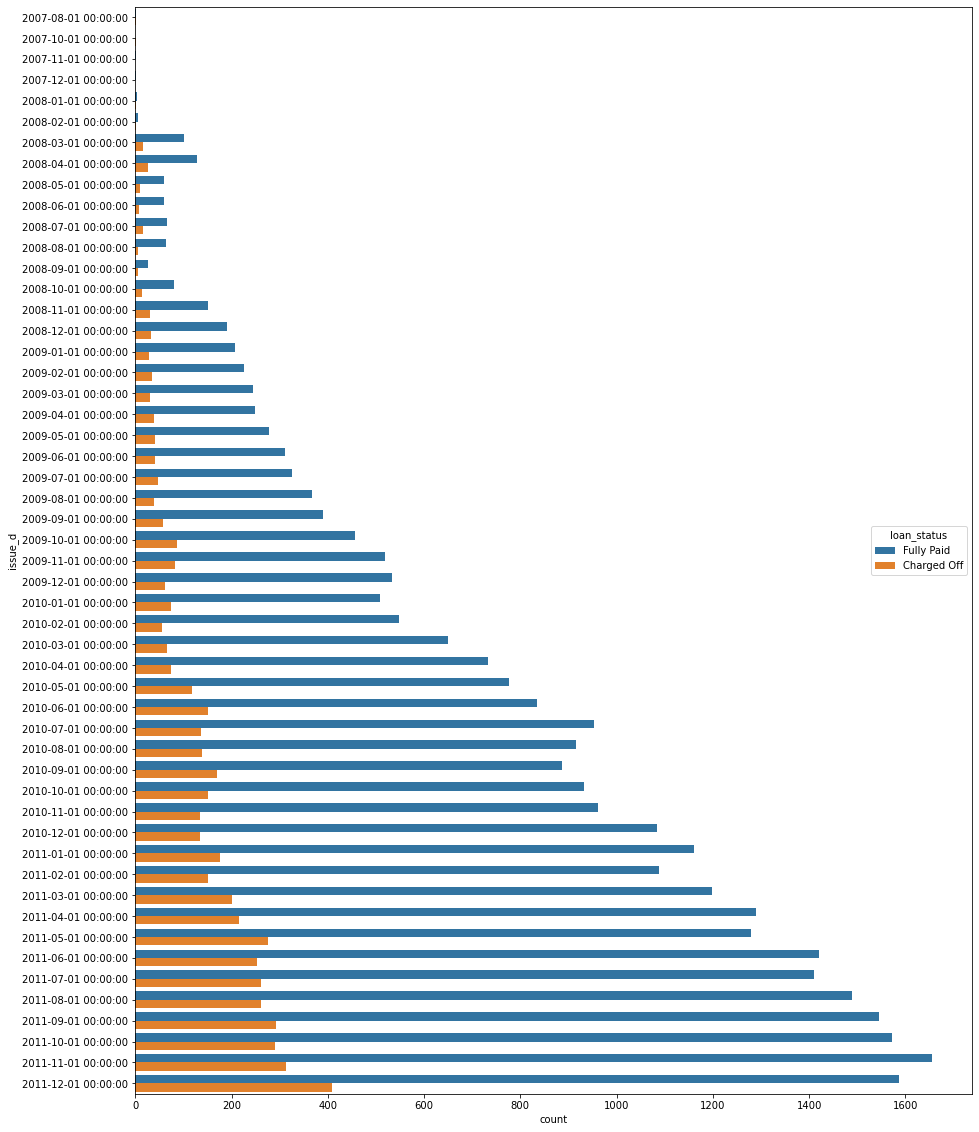

In [89]:
drawBarWithLoanStatus("issue_d", figsize=(15,20))

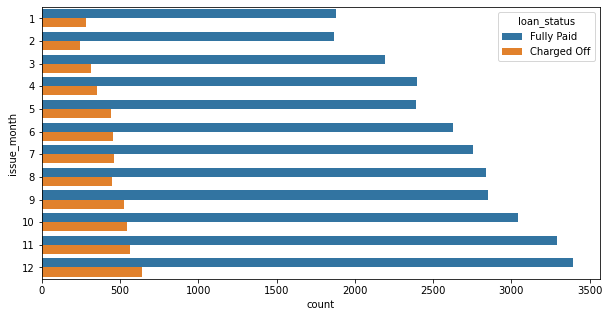

In [90]:
drawBarWithLoanStatus("issue_month")

In [ ]:
df['loan_amnt_range'] = df['loan_amnt'].apply(lambda x: convertToRange(x,'loan_amnt'))
# df.loc[df['loan_amnt'], 'loan_amnt_range'] = df['loan_amnt'].apply(lambda x: convertToRange(x,'loan_amnt'))

In [ ]:
df['loan_amnt_range'].count()

In [ ]:
# Function to draw scater plot for 2 quantitative variables with loan_status in color
def drawScatterPlot(col_1, col_2, data=df):
    plt.figure(figsize=(15,7))
    sns.scatterplot(x=col_1, y=col_2, hue="loan_status", data=data)
    plt.title("Scatter plot: " + col_1 + " & " + col_2)
    plt.show()
    
def drawMultiBoxPlot(col_1, col_2, hue="loan_status", data=df):
    plt.figure(figsize=(15,7))
    sns.boxplot(x=col_1, y=col_2, data=data, hue=hue, order=sorted(data[col_1].unique()))
    plt.title("Box plot: " + col_1 + " & " + col_2 +" for each "+ hue)
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.show()
    
def groupedDataBiVariate(col,data=df):
    # @Param
    # data : Dataframe
    # col: Column to be grouped by
    grouped_data = pd.crosstab(data[col], df['loan_status'],margins=True)
    grouped_data['% Charged Off'] = round(((100*grouped_data['Charged Off'])/grouped_data['All']),3)
    display(grouped_data)
    grouped_data = grouped_data[0:-1]
    display(grouped_data)
    return grouped_data

def drawGraphPercChargedOff(col,data=df):
    # @Param
    # df      : Dataframe
    # col     : Column Name
    # stacked : True(default) for Stacked Bar
    
    # get grouped dataframe with % charged off value
    grouped_data = groupedDataBiVariate(col,data)
    
    barPlot =  grouped_data.iloc[:,0:2]
    percChargedOff = grouped_data[['% Charged Off']]      

    ax = percChargedOff.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()
    

In [ ]:
drawGraphPercChargedOff('term')

In [ ]:
drawScatterPlot("int_rate", "annual_inc")

In [ ]:
drawScatterPlot("annual_inc", "dti")

In [ ]:
drawScatterPlot("annual_inc", "funded_amnt_inv")

In [ ]:
drawMultiBoxPlot("term", "int_rate")

In [ ]:
df.head()